In [43]:
import numpy as np
from numpy import linalg as la
from scipy.linalg import eig
import matplotlib.pyplot as plt

# Problema 1.

<center>

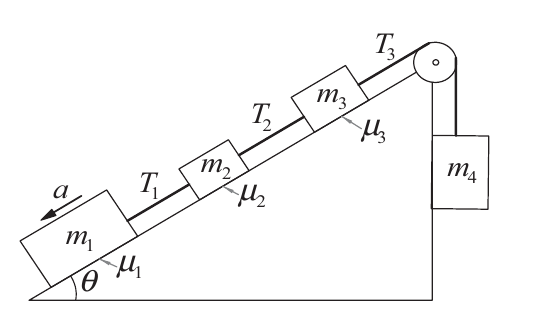

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta) 
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta) 
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta) 
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [2]:
theta = np.radians(45) #Radianes
g = 9.81 #m/s^2

m = np.array([10, 4, 5, 6]) #Kg
friccion = np.array([0.25, 0.3, 0.2])

b = np.array([
    m[0]*g*(np.sin(theta) - friccion[0]*np.cos(theta)),
    m[1]*g*(np.sin(theta) - friccion[1]*np.cos(theta)),
    m[2]*g*(np.sin(theta) - friccion[2]*np.cos(theta)),
    -m[3]*g]) 

A = np.array([
    [1, 0, 0, m[0]],
    [-1, 1, 0, m[1]],
    [0, -1, 1, m[2]],
    [0, 0, -1, m[3]]
]) # T1, T2, T3, a

T1, T2, T3, a = np.linalg.solve(A, b)

print(f'Las tensiones T1, T2 y T3 son en es orden: {T1}, {T2}, {T3}\ny la aceleracion del sistema: {a}')


Las tensiones T1, T2 y T3 son en es orden: 35.89135719172326, 48.86055656372456, 68.54041454044619
y la aceleracion del sistema: 1.6134024234076987


# Problema 2. 
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

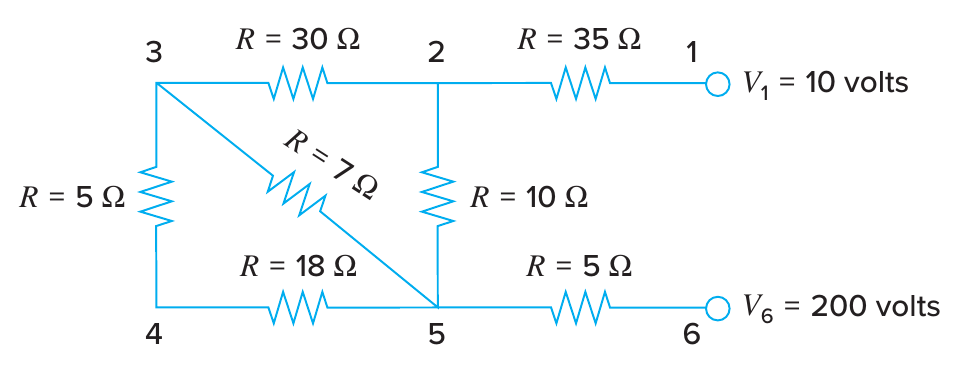

In [3]:
V1 = 10
V2 = 200

# Resistencias (Omhs)
R1 = 35
R2 = 30
R3 = 5
R4 = 18
R5 = 5
R6 = 10
R7 = 7

# De las leyes de Kirchoff

# I12, I23, I34, I45, I56, I35, I52
A = np.array([
    [1, -1, 0, 0, 0, 0, -1],
    [0, 1, -1, 0, 0, -1, 0],
    [0, 0, 1, -1, 0, 0, 0],
    [0, 0, 0, 1, -1, -1, -1],
    [-R1, 0, 0, 0, -R5, 0, -R6],
    [0, 0, R3, R4, 0, -R7, 0],
    [0, R2, 0, 0, 0, R7, -R6]
])

b = np.array([0, 0, 0, 0, V2+V1, 0, 0])

I = np.linalg.solve(A, b)
 
print(f'Los valores de las corrientes I12, I23, I34, I45, I56, I35, I52 son, respectivamente:\n{I}')

Los valores de las corrientes I12, I23, I34, I45, I56, I35, I52 son, respectivamente:
[-5.48158803 -1.20828539 -0.28193326 -0.28193326  4.91772152 -0.92635213
 -4.27330265]


# Problema 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), 
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

Text(0.5, 1.0, 'analitico')

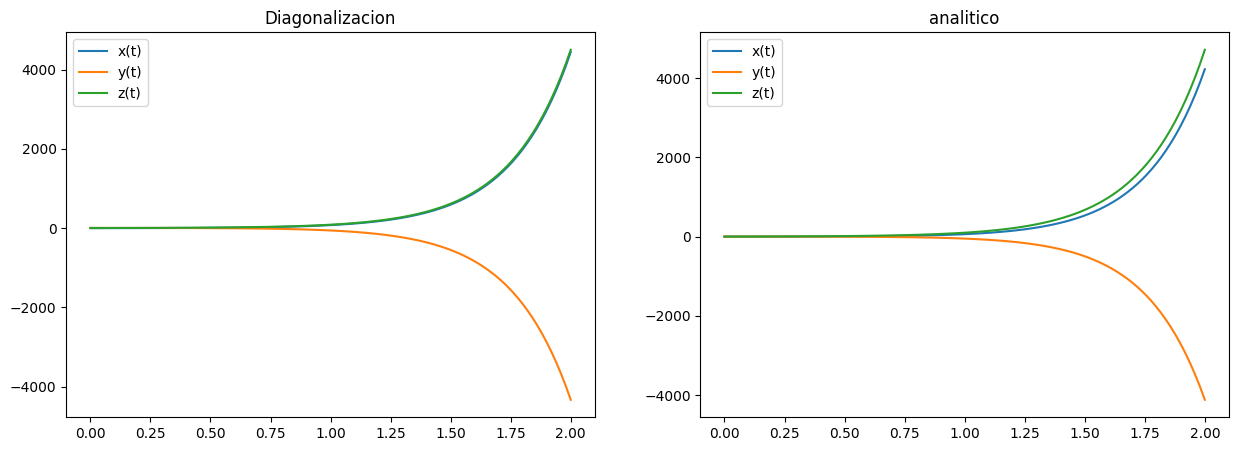

In [110]:
A = np.array([
    [2, -1, 1],
    [0, 3, -1],
    [2, 1, 3]
], dtype= float)

r0 = np.array([1, 1, 2], dtype= float)

val, U = la.eig(A)

D = np.real(np.diag(val))

#F(A) = e^At = U*e^DtU^(-1) 

rt = lambda t: (U@np.exp(D*t)@la.inv(U))@r0

def analitica(t):

    xt = (r0[0]*(np.exp(2*t)*(1+np.exp(2*t)-2*t)) + r0[1]*(-2*t*np.exp(2*t)) + r0[2]*(np.exp(2*t)*(-1 + np.exp(2*t))))/2
    yt = (r0[0]*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t)) + r0[1]*(2*(t+1)*np.exp(2*t)) + r0[2]*(-np.exp(2*t)*(-1 + np.exp(2*t))))/2
    zt = (r0[0]*(np.exp(2*t)*(-1+np.exp(2*t)+2*t)) + r0[1]*(2*t*np.exp(2*t)) + r0[2]*(np.exp(2*t)*(1 + np.exp(2*t))))/2

    return xt, yt, zt

t = np.linspace(0, 2, 100)
x, y, z = np.array([np.real(rt(x)) for x in t]).T
x_analitica, y_analitica, z_analitica = analitica(t)

fig, ax = plt.subplots(1, 2, figsize= (15, 5))

ax[0].plot(t, x, label= 'x(t)')
ax[0].plot(t, y, label= 'y(t)')
ax[0].plot(t, z, label= 'z(t)')

ax[0].legend()
ax[0].set_title('Diagonalizacion')

ax[1].plot(t, x_analitica, label= 'x(t)')
ax[1].plot(t, y_analitica, label= 'y(t)')
ax[1].plot(t, z_analitica, label= 'z(t)')

ax[1].legend()
ax[1].set_title('analitico')



# Problema 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix} 
B_z & B_x - iB_y \\ 
B_x + iB_y & -B_z 
\end{pmatrix} 
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.


In [ ]:
gamma = 2
hbar = 1.054571817e-34

bx, by, bz = np.random.uniform(-10, 10, size= (3))

H = -gamma*hbar/2 *np.array([
    [bz, bx - 1j*by],
    [bx + 1j*by, -bz]
])

#a)

H_transpuesta = H.conjugate().T

print("H =\n", H)
print("\nH† =\n", H_transpuesta)
print("\n¿Es hermitiana?:", np.allclose(H, H_transpuesta))


H =
 [[ 4.32181453e-35-0.0000000e+00j  2.26857128e-34+5.5608877e-34j]
 [ 2.26857128e-34-5.5608877e-34j -4.32181453e-35+0.0000000e+00j]]

H† =
 [[ 4.32181453e-35+0.0000000e+00j  2.26857128e-34+5.5608877e-34j]
 [ 2.26857128e-34-5.5608877e-34j -4.32181453e-35-0.0000000e+00j]]

¿Es hermitiana?: True


In [ ]:
#b)

E_Permitidos, vectores = la.eigh(H)

print(f'Los valores de energia permitidos son: {E_Permitidos}')

#c)

normas = [la.norm(v) for v in vectores]

print(f'Las normas de los vectores son: {normas}')


Los valores de energia permitidos son: [-6.02135105e-34  6.02135105e-34]
Las normas de los vectores son: [np.float64(1.0), np.float64(1.0000000000000002)]


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura. 

<center>

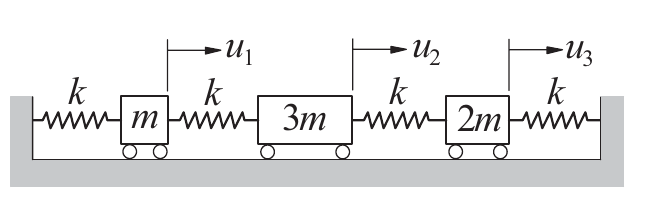
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1 
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2 
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [126]:
k = 2.
m = 1.5

A = np.array([
    [-2, 1, 0],
    [1, -2, 1],
    [0, 1, -2]
])

M = - np.diag([1, 3, 2])

#k/m Au = Mü => k/m Av = w^2 Mv = > k/m M^-1 Av = w^2 v, λ autovalores de M^-1*A, k/m λ = w^2

S = la.inv(M)@A

lambda2, formas_modales = eig(S)

w = np.sqrt(k/m * lambda2)

print(f'Para k= {k} y m= {m}:\n',
      f'Las frecuencias de vibracion son: {w}\n',
      f'Formas modales: {formas_modales}')

Para k= 2.0 y m= 1.5:
 Las frecuencias de vibracion son: [1.72546598+0.j 0.58059912+0.j 1.25481501+0.j]
 Formas modales: [[-0.96983375 -0.42955167 -0.38362421]
 [ 0.22589817 -0.75050344 -0.31421871]
 [-0.0916107  -0.502225    0.86838877]]
